In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
ff_train = pd.read_pickle("TEP_FaultFree_Training_fault_free_training.pkl")
ff_test = pd.read_pickle("TEP_FaultFree_Testing_fault_free_testing.pkl")
f_train = pd.read_pickle("TEP_Faulty_Training_faulty_training.pkl")
f_test = pd.read_pickle("TEP_Faulty_Testing_faulty_testing.pkl")

# EDA
print("Shapes:")
print("Fault-Free Training:", ff_train.shape)
print("Fault-Free Testing:", ff_test.shape)
print("Faulty Training:", f_train.shape)
print("Faulty Testing:", f_test.shape)
print("\nMissing values (Fault-Free Training):")
print(ff_train.isnull().sum().sum())
print("\nMissing values (Faulty Training):")
print(f_train.isnull().sum().sum())
print("\nSample columns:")
print(ff_train.columns[:10].tolist())
print("\nSample rows from Fault-Free Training:")
print(ff_train.head())

# Check for Fault Labels in Faulty Data
fault_col = [col for col in f_train.columns if 'fault' in col.lower()]
if fault_col:
    print("\nDetected fault label column:", fault_col[0])
    print(f_train[fault_col[0]].value_counts())
else:
    print("\nNo explicit fault label column found.")

# Print dtypes
print("\nData types in Fault-Free Training:")
print(ff_train.dtypes)
print("\nData types in Faulty Training:")
print(f_train.dtypes)

Shapes:
Fault-Free Training: (250000, 55)
Fault-Free Testing: (480000, 55)
Faulty Training: (5000000, 55)
Faulty Testing: (9600000, 55)

Missing values (Fault-Free Training):
0

Missing values (Faulty Training):
0

Sample columns:
['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7']

Sample rows from Fault-Free Training:
   faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.

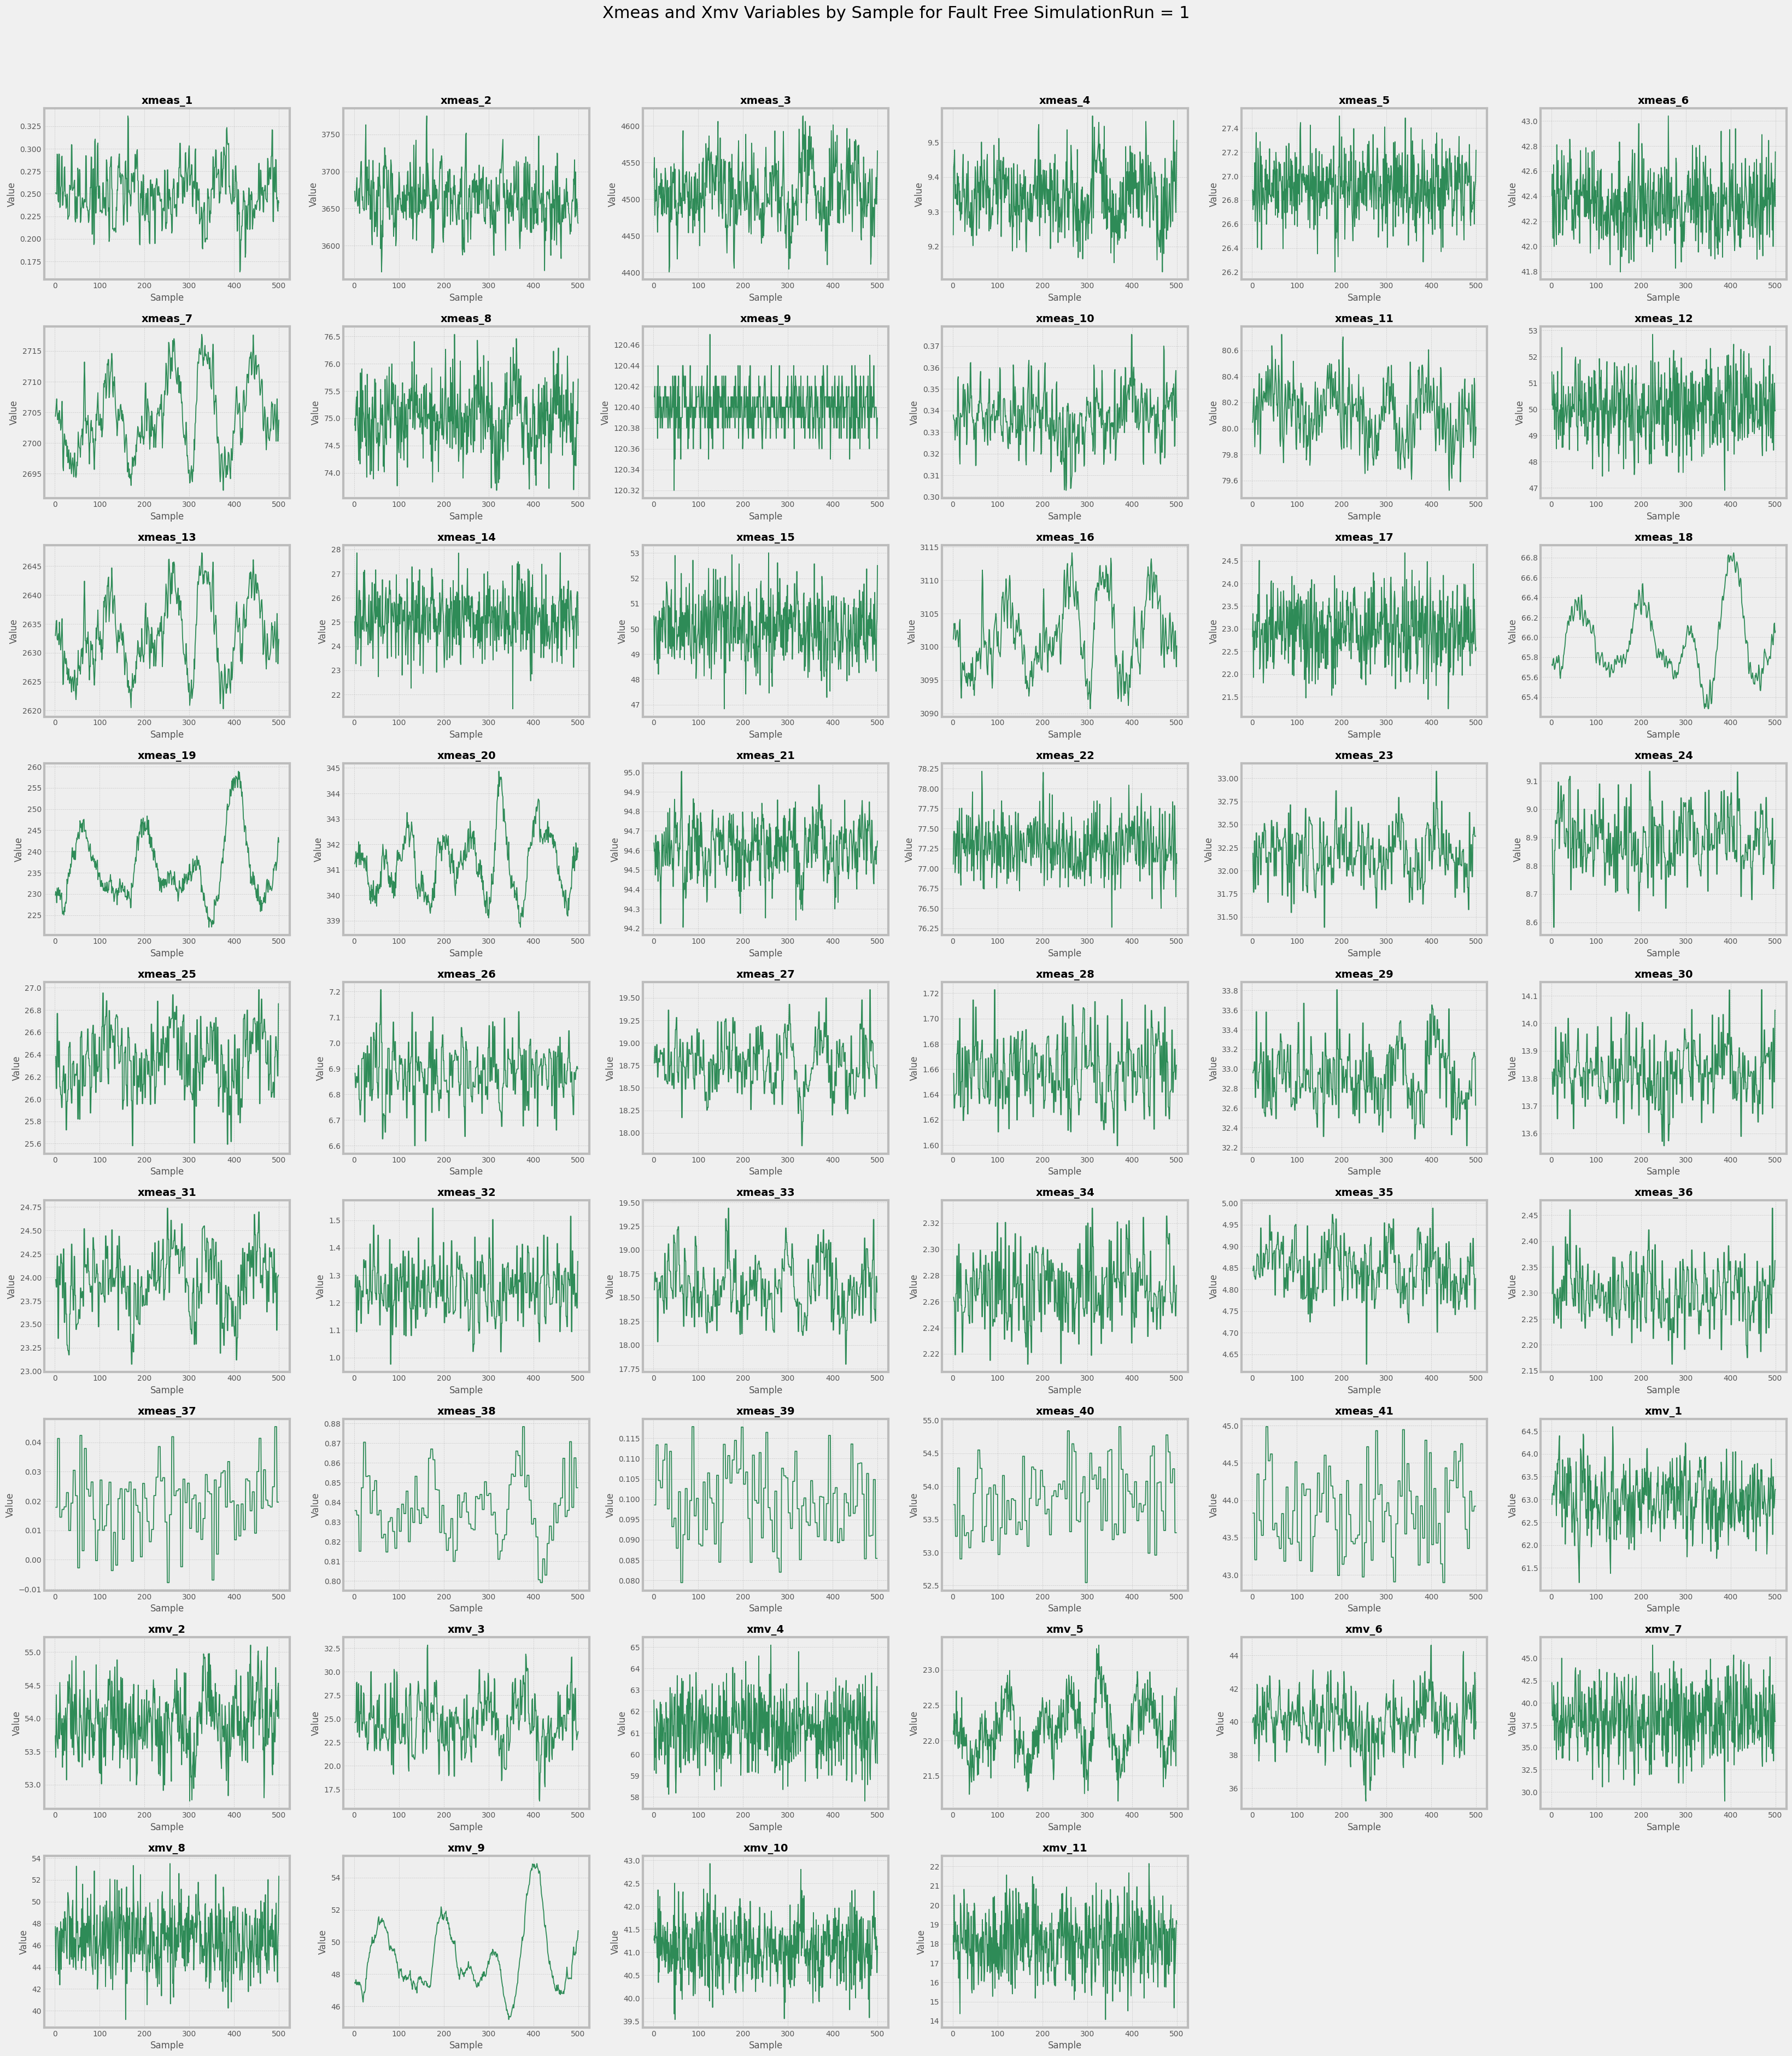

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("bmh")
df = pd.read_pickle("TEP_FaultFree_Training_fault_free_training.pkl")
sim1 = df[df["simulationRun"] == 1]
xmeas_cols = [col for col in sim1.columns if col.lower().startswith("xmeas")]
xmv_cols = [col for col in sim1.columns if col.lower().startswith("xmv")]
all_cols = xmeas_cols + xmv_cols
n_cols = 6
n_rows = int((len(all_cols) + n_cols - 1) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(33, 4.2 * n_rows))
axes = axes.flatten()
for i, col in enumerate(all_cols):
    axes[i].plot(sim1["sample"], sim1[col], linewidth=1.3, color="#2E8B57")
    axes[i].set_title(col, fontsize=14, weight='semibold')
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add axis labels
for ax in axes:
    ax.set_xlabel("Sample", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)

# Add title
fig.suptitle("Xmeas and Xmv Variables by Sample for Fault Free SimulationRun = 1", fontsize=22, y=0.995, weight='normal')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
